In [18]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
# Define arrays 
t = []
S = []
E = []
I = [] 
R = []
dS = [] 
dE = [] 
dI = [] 
dR = []

In [20]:
# Define initial variables 
S0 = 8771761/(8771761+142+37+30)
E0 = 142/(8771761+142+37+30) 
I0 = 37/(8771761+142+37+30)
R0 = 30/(8771761+142+37+30)

# Add initial variables to list
S.append(S0)
E.append(E0) 
I.append(I0) 
R.append(R0) 

In [21]:
# Parameter values 
h = 1
N = 1
sigma = 0.309 
beta = 0.00000002 
alpha = 0.4 
gamma = 0.1667 
delta = 0.14 
mu = 0.0012 
theta = 0.0187

In [22]:
# Define system of differential equations 
# dS/dt 
def dS(R, E, S):
    return (1 - sigma)*theta*N + delta*R - beta*S*E - mu*S 
# dE/dt
def dE(S, E):
    return beta*S*E - alpha*E - mu*E
# dI/dt 
def dI(E, I):
    return alpha*E - gamma*I - mu*I 
# dR/dt 
def dR(I, R):
    return gamma*I + sigma*theta*N - delta*R - mu*R


In [23]:
# RK4 calculation

for i in range(0,100):
    # k for dS/dt
    # l for dE/dt 
    # m for dI/dt
    # n for dR/dt 

    k1 = h * dS(R[i], E[i], S[i])
    l1 = h * dE(S[i], E[i]) 
    m1 = h * dI(E[i], I[i]) 
    n1 = h * dR(I[i], R[i]) 

    k2 = h * dS(R[i]+(h/2)*(n1), E[i]+(h/2)*(l1), S[i]+(k1/2))
    l2 = h * dE(S[i]+(h/2)*(l1), E[i]+(l1/2))
    m2 = h * dI(E[i]+(l1/2), I[i]+(m1/2))
    n2 = h * dR(I[i]+(m1/2), R[i]+(n1/2)) 

    k3 = h * dS(R[i]+(h/2)*(n2), E[i]+(h/2)*(l2), S[i]+(k2/2))
    l3 = h * dE(S[i]+(k2/2), E[i]+(l2/2)) 
    m3 = h * dI(E[i]+(l2/2), I[i]+(m2/2))
    n3 = h * dR(I[i]+(m2/2), R[i]+(n2/2)) 

    k4 = h * dS(R[i]+n3, E[i]+l3, S[i]+k3)
    l4 = h * dE(S[i]+k3, E[i]+l3)
    m4 = h * dI(E[i]+l3, I[i]+m3)
    n4 = h * dR(I[i]+m3, R[i]+n3)

    S.append(S[i] + ((1/6) * h * (k1 + 2*k2 + 2*k3 + k4)))
    E.append(E[i] + ((1/6) * h * (l1 + 2*l2 + 2*l3 + l4)))
    I.append(I[i] + ((1/6) * h * (m1 + 2*m2 + 2*m3 + m4)))
    R.append(R[i] + ((1/6) * h * (n1 + 2*n2 + 2*n3 + n4)))

In [24]:
t = list(range(0,101))
d = {'t':t, 'S(t)':S, 'E(t)':E, 'I(t)':I, 'R(t)':R}
df = pd.DataFrame(data=d)
df

,t,S(t),E(t),I(t),R(t)
0,0,0.999976,1.618793e-05,4.217981e-06,0.000003
1,1,1.012077,1.083939e-05,8.446493e-06,0.005393
2,2,1.024867,7.258027e-06,1.040893e-05,0.010073
3,3,1.038253,4.859956e-06,1.098832e-05,0.014137
4,4,1.052152,3.254213e-06,1.075517e-05,0.017666
...,...,...,...,...,...
96,96,2.545921,3.071190e-22,3.196687e-12,0.040923
97,97,2.561507,2.056460e-22,2.702606e-12,0.040923
98,98,2.577075,1.377000e-22,2.284889e-12,0.040923
99,99,2.592624,9.220357e-23,1.931736e-12,0.040923


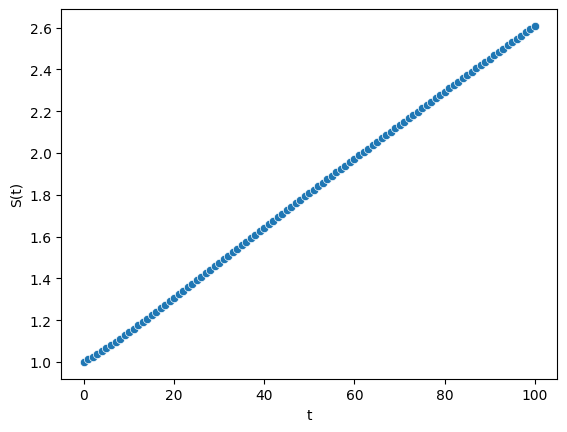

In [25]:
S_plot = sns.scatterplot(x='t', y='S(t)', data=df)

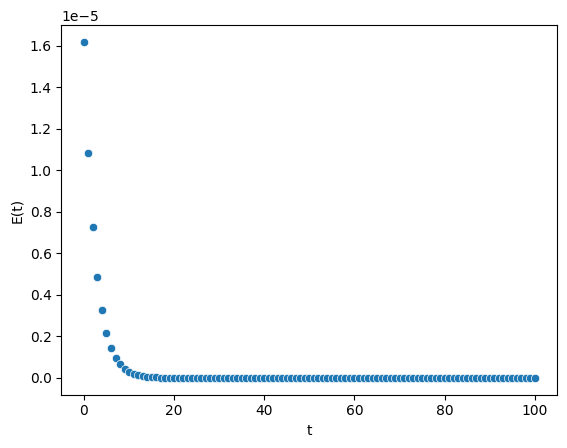

In [26]:
E_plot = sns.scatterplot(x='t', y='E(t)', data=df)

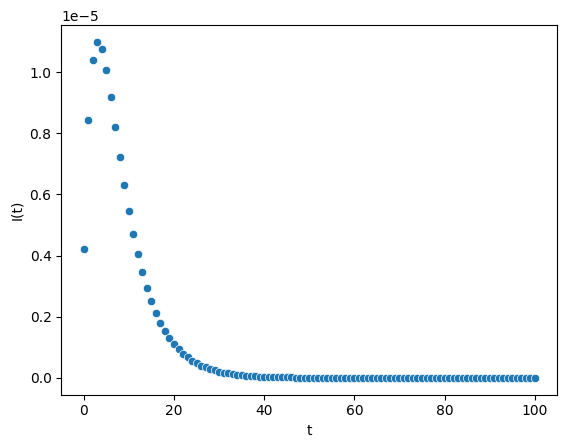

In [27]:
I_plot = sns.scatterplot(x='t', y='I(t)', data=df)

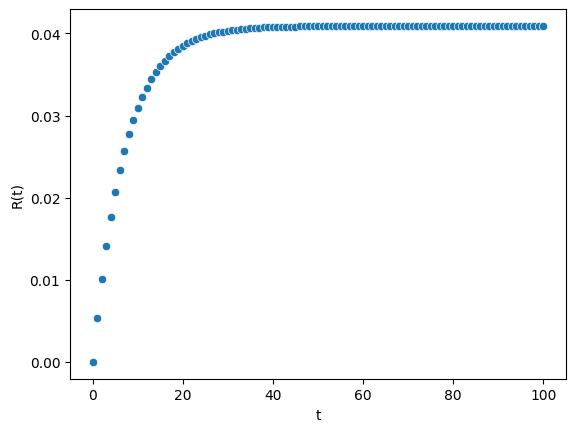

In [28]:
R_plot = sns.scatterplot(x='t', y='R(t)', data=df, )


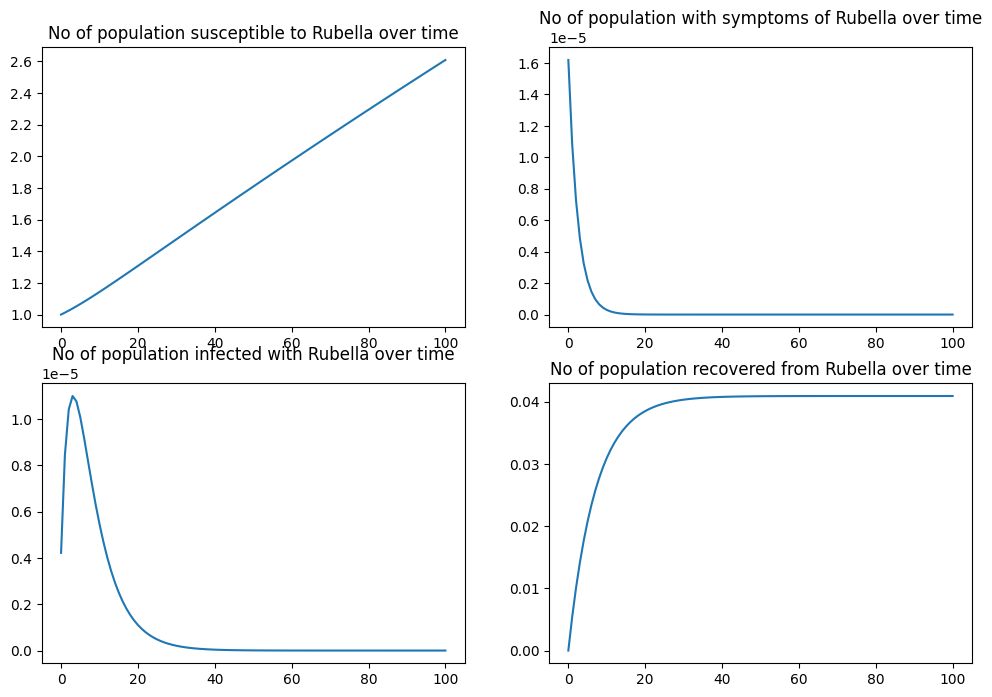

In [29]:
# Plot in same figure
figure, axis = plt.subplots(2, 2, figsize=(12, 8))
axis[0, 0].plot(t, S)
axis[0, 0].set_title("No of population susceptible to Rubella over time")
axis[0, 1].plot(t, E)
axis[0, 1].set_title("No of population with symptoms of Rubella over time")
axis[1, 0].plot(t, I)
axis[1, 0].set_title("No of population infected with Rubella over time")
axis[1, 1].plot(t, R)
axis[1, 1].set_title("No of population recovered from Rubella over time")
plt.show()

In [30]:
# Export data to csv file
df.to_csv('data.csv')